## Learning Objectives 

- Review of Linear Regression that we learned in QL

- How we can obtain the best slope and intercept using sklearn 

- How we can evaluate the linear regression model

## Review of Linear Regression

- We want to present the relationship between variables linearly, for example, recall the running distance and drinking water 

- In regression, we are interested in predicting a scalar-valued target, such as the price of a stock.

- By linear, we mean that the target must be predicted as a linear function of the inputs

## Simple Linear Regression 

<img src="Images/lreg_1.png" width="600" height="600">


What elements are present in the diagram?

The black dots are the observed values of x and y.

The blue line is our prediction.

The red lines are the errors, which are the distances between the observed values and the prediction.

## Activity: 

- The distances that a runner has been run (in Mile) and the amount of water that he/she drinks (in Liters) is given 

## Do:

- Plot the scatter of distance versus water that consumed  
- Find the best line that describes this relationship
- Plot the best line that you found

Text(0, 0.5, 'Water Drinks (Litre)')

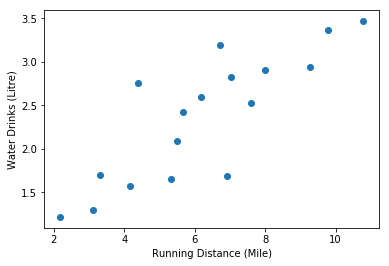

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])


Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])

plt.scatter(X, Y)
plt.xlabel('Running Distance (Mile)')
plt.ylabel('Water Drinks (Litre)')

## Important data format passing to sklearn:

In [3]:
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654])

print(X.reshape(-1, 1))

[[ 3.3  ]
 [ 4.4  ]
 [ 5.5  ]
 [ 6.71 ]
 [ 6.93 ]
 [ 4.168]
 [ 9.779]
 [ 6.182]
 [ 7.59 ]
 [ 2.167]
 [ 7.042]
 [10.791]
 [ 5.313]
 [ 7.997]
 [ 5.654]]


## Activity: Obtain the best slope and intercept for given data using sklearn

In [5]:
from sklearn.linear_model import LinearRegression

lr_reg = LinearRegression()

lr_reg.fit(X.reshape(-1, 1), Y)

print(lr_reg.coef_)

print(lr_reg.intercept_)

ValueError: Found input variables with inconsistent numbers of samples: [15, 17]

## Question: 

- If this runner runs for 5 miles, how much water he/she will drink?

In [4]:
lr_reg.predict([[5.0]])

array([[2.05697595]])

## Question: 

- What is the mean-squared-error of our Linear Regression Model?

0.15385767404191164


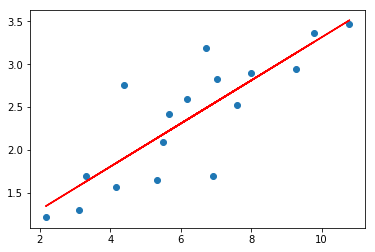

In [7]:
y_predicted = list(map(lambda x: 0.25163494*x + 0.79880123, X))
plt.scatter(X, Y)
plt.plot(X, y_predicted ,'r')
error = sum([ (i-j)**2 for i, j in zip(Y, y_predicted) ]) / len(Y)
print(error)

## Question: what are the metrics in order to evaluate Regression Model?

1 - Mean-Squared-Error (MSE)

2- R-Squared: is a number between 0 to 1, close to one means better model

## Activity: How much companies' sales would be based on their product advertisement?

- Different companies (150 companies) spent money to advertise their product on TV, radio and newspaper

- Based on their advertisments, they have calculated the sale that they had

- For some new companies (50), they want to have an estimation if spend X dollar, Y dollar and Z dollar 

on TV, radio and newspaper, respectively, how much their sales would be?

In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


df = pd.read_csv("Advertising.csv")
feature_cols = ["TV", "radio", "newspaper"]

# Use the top 150 companies to train the Linear Regression Model
X_train = df[feature_cols][:150]
Y_train = df.sales[:150]

# Instansiate the model (Linear Regression) and train it
print("Generating a linear regression on the top 150 companies (first one)")
sales_reg = LinearRegression()
sales_reg.fit(X_train, Y_train)

print("Printing the coefficient and y intercept of our first 150 sales")
print(sales_reg.coef_)
print(sales_reg.intercept_)

# Predict the botton 50 companies' sales
X_test = df[feature_cols][-50:]
Y_test = df.sales[-50:]
print("Predicting the sales of the bottom 50 companies (last ones)")
print(sales_reg.predict(X_test))

print(sales_reg.score(X_test, Y_test))
print(r2_score(Y_test, sales_reg.predict(X_test)))

Generating a linear regression on the top 150 companies (first one)
Printing the coefficient and y intercept of our first 150 sales
[ 0.04700012  0.17993257 -0.00140273]
3.0297667962936856
Predicting the sales of the bottom 50 companies (last ones)
[18.67186188 10.15990172 16.48950045 18.17132726 15.63964047  5.30168953
 15.19930681 10.27021058 10.15577653 12.48190724 14.35100299 13.43010832
 15.10545883 17.32542469 11.17561481 14.54411372 10.60623457 13.6578278
 17.31920373 18.29020846  7.44118029 14.4553876   7.54376735 12.20415315
 14.07598825 24.7841683  20.11008458 12.38328494 16.41529992 12.58762415
 10.84616747 14.23249384  6.65512798 24.18338541 18.74887883 20.75225663
  9.92682913 17.15002463 18.96767352  6.05302918 12.27336433  8.51313117
  4.53156602 18.42150484 16.46286778  5.47156415  8.32748549 13.01318332
 23.82330766 15.4737108 ]
0.8963519785440214
0.8963519785440214


### Question: If a new company spends  100, 100 and 20 on TV, radio and newspaper, respectively on advertisement:

### How much sale it would have?

In [9]:
sales_reg.predict([[100, 100, 20]])

array([25.69498118])